In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import scipy as scp

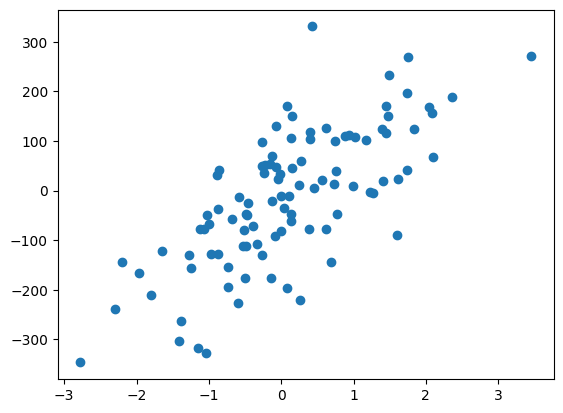

In [3]:
#génération des données
X, y = make_regression(n_samples=100, n_features=5, noise=3)

plt.scatter(X[:,0], y)

In [4]:
#dimension des matrices
print(X.shape)
y = y.reshape((y.shape[0], 1))
print(y.shape)

(100, 5)
(100, 1)


In [5]:
theta = np.random.randn(X.shape[1], 1)

In [6]:
def model(X, theta):
    return X @ theta

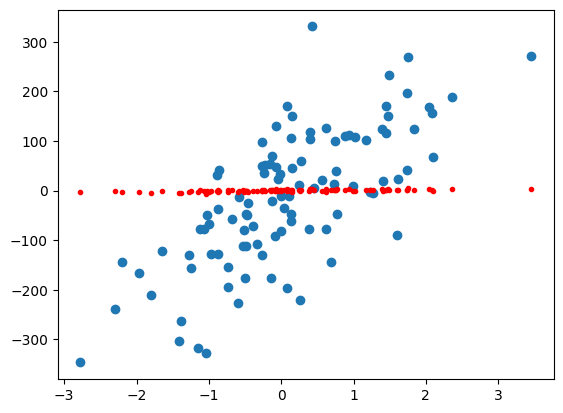

In [7]:
plt.scatter(X[:,0], y)
plt.scatter(X[:,0], model(X, theta), c='red', marker='.')

In [8]:
def fonction_cout(X, y, theta):
    return (1 / X.shape[0]) * np.sum((model(X, theta) - y)**2)

In [9]:
#méthode analytique
def LU(X, y):
    #factorisation LU
    P, L, U  = scp.linalg.lu(X.T @ X)

    #résolution du prémier système
    theta1 = scp.linalg.solve(P, X.T @ y)
    theta2 = scp.linalg.solve(L, theta1)
    theta = scp.linalg.solve(U, theta2)

    return theta

In [10]:
theta_optim1 = LU(X, y)

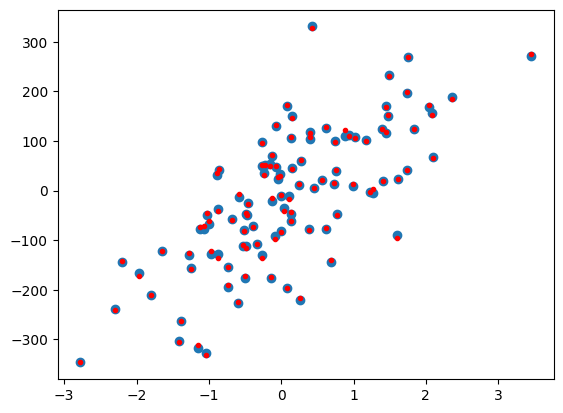

In [11]:
plt.scatter(X[:,0], y)
plt.scatter(X[:,0], model(X, theta_optim1), c='red', marker='.')

In [12]:
#méthode iterative
def jacobi(X, y):
    theta, _ = scp.sparse.linalg.jacobi(X.T @ X, X.T @ y)

    return theta

def gauss_seidel(X, y):
    theta, converge = scp.sparse.linalg.iterative.gauss_seidel(X.T @ X, X.T @ y)

    if converge == 0:
      return theta
    else:
      return 'Les critère de convergence ne sont pas satisfaite'


In [14]:
theta_optim2 = gauss_seidel(X, y)

AttributeError: ignored